# Assignment 5: Exploratory Data Analysis and Hypothesis Testing

**Student:** [YI-CHEN LO (Ejane)]  
**Dataset:** [Online Shoppers]  
**Date:** [Oct 08/2025]

## Objective
Perform exploratory data analysis (EDA) and hypothesis testing on your chosen dataset. Identify patterns and test meaningful hypotheses about relationships between variables.

---


## Introduction 

The dataset being used in this analysis is the Online Shoppers Purchasing Intention Dataset, obtained from the UCI Purchasing Intention Dataset (Dataset ID: 468). It includes 12,330 observations and 18 variables, capturing various traits of users' online shopping behavior. 

I've chosen the dataset because it offers a realistic view of consumer behavior in e-commerce, a topic that's highly relevent today. Understanding what factors influence online purchases is crucial to businesses, enabling them to optimize their website design, marketing strategies, etc. 

The main goal of analysis is what differentiates purchasing sessions from the non-purchasing ones, including questions like: 

1. Does higher PageValues associated with purchassing sessions?
2. Are returning visitors more likely to make purchases compared to new visitors?
3. Do weekend sessions lead to higher purchase rates? 


## 1. Import Data and Libraries

Import the necessary libraries and load your dataset.


In [ ]:
# Install ucimlrepo 
%pip install ucimlrepo

# standard action when fetching datasets directly from the UCI Machine Learning Repository. 


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
# Import libraries
import pandas as pd
# used for data manipulation and creating dataframes
import numpy as np
# provides numerical operations like performing calculations
import matplotlib.pyplot as plt
# this is for data visualization, allowing us to plot histograms, boxplots...
import seaborn as sns
# same for data visualization
from scipy import stats
# provides statistical function for hypothesis testing

# Set up plotting
plt.style.use('default')
# resets plotting style for consistency
sns.set_palette("husl")
# sets a color palette for Seaborn plots to make them visually appealing 

print("Libraries imported successfully!")


Libraries imported successfully!


In [ ]:
# Load your dataset here
# Replace this with your actual data loading code
# Example for Heart Disease dataset:
# df = pd.read_csv('heart_disease.csv')

# Import fetch_ucirepo after installing
from ucimlrepo import fetch_ucirepo

# Load the Online Shoppers Purchasing Intention dataset from UCI
online_shoppers_purchasing_intention_dataset = fetch_ucirepo(id=468)
# retrieves the Online Shoppers Purchasing Intention Dataset from UCI directly into Python
# using ID ensuring we fetch the exact dataset intended, avoiding manually downloading CSV files

# Extract features and target variables as pandas DataFrames
X = online_shoppers_purchasing_intention_dataset.data.features
y = online_shoppers_purchasing_intention_dataset.data.targets

# Combine X and y into one DataFrame for convenience
df = pd.concat([X, y], axis=1)
# X contains input features, y contains target variable (Revenue)
# Concatenating X and y along the columns (axis=1) creates a single DataFrame df which simplifies exploratory analysis and plotting.

# Display dataset metadata
print("\n--- Dataset Metadata ---")
print(online_shoppers_purchasing_intention_dataset.metadata)
# Metadata provides information about the dataset such as number of instances, features, target classes, missing values, and other useful notes.

# Display variable information
print("\n--- Variable Information ---")
print(online_shoppers_purchasing_intention_dataset.variables)
# prints information about each variable, including data type, possible values, and whether it is categorical or numerical.

# Preview the dataset
print("\n--- Data Preview ---")
print(df.head())
# displays the first 5 rows of dataset to verify that X and y were combined correctly



--- Dataset Metadata ---
{'uci_id': 468, 'name': 'Online Shoppers Purchasing Intention Dataset', 'repository_url': 'https://archive.ics.uci.edu/dataset/468/online+shoppers+purchasing+intention+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/468/data.csv', 'abstract': 'Of the 12,330 sessions in the dataset,\n84.5% (10,422) were negative class samples that did not\nend with shopping, and the rest (1908) were positive class\nsamples ending with shopping.', 'area': 'Business', 'tasks': ['Classification', 'Clustering'], 'characteristics': ['Multivariate'], 'num_instances': 12330, 'num_features': 17, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Revenue'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2018, 'last_updated': 'Thu Jan 11 2024', 'dataset_doi': '10.24432/C5F88Q', 'creators': ['C. Sakar', 'Yomi Kastro'], 'intro_paper': {'ID': 367, 'type': 'NATIVE', 'title': 'Real-time predicti

## 2. Exploratory Data Analysis (EDA)

Explore your dataset to understand its structure and identify patterns.


In [5]:
# --- Basic dataset overview ---
print("=== DATASET OVERVIEW ===")
print(f"Shape: {df.shape}")  # Number of rows and columns
print("\n--- Data Types ---")
print(df.dtypes)
print("\n--- Missing Values ---")
print(df.isnull().sum())
print("\n--- Basic Statistics (Numerical Columns) ---")
print(df.describe())


=== DATASET OVERVIEW ===
Shape: (12330, 18)

--- Data Types ---
Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

--- Missing Values ---
Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
Special

=== TARGET VARIABLE: REVENUE ===
Target distribution (number of sessions):
Revenue
False    10422
True      1908
Name: count, dtype: int64

Percentage distribution:
Revenue
False    84.53
True     15.47
Name: count, dtype: float64


/tmp/ipykernel_2416/2657078258.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_counts.index, y=target_counts.values, palette="husl")


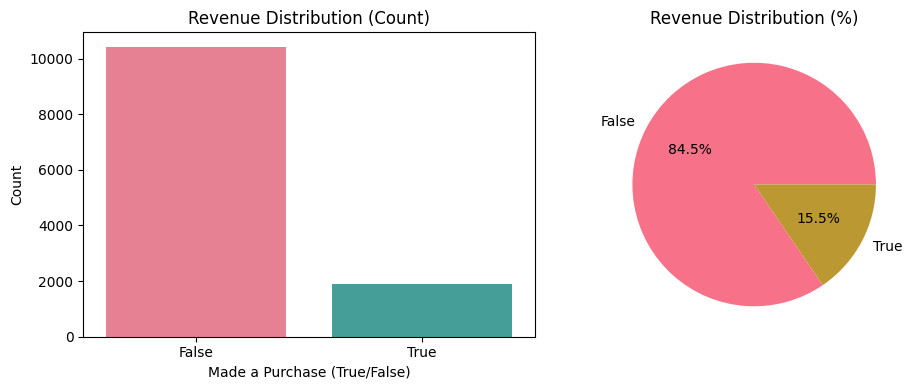

In [ ]:
# --- Target Variable Analysis: Revenue ---

print("=== TARGET VARIABLE: REVENUE ===")
# This section explores the target variable "Revenue", which indicates whether a user made a purchase (True = 1) or not (False = 0).
# Understanding the target distribution is essential in EDA because it reveals whether the dataset is balanced or imbalanced,
# which can affect the reliability of later statistical tests

# The value_counts() function counts how many sessions ended with (True) and without (False) a purchase.
# The percentage distribution provides additional context to understand the proportion of purchasing vs. non-purchasing sessions.


# Count the number of sessions that ended with and without a purchase
target_counts = df['Revenue'].value_counts()

print("Target distribution (number of sessions):")
print(target_counts)
print("\nPercentage distribution:")
print(round((target_counts / len(df)) * 100, 2))

# --- Visualize target distribution ---
plt.figure(figsize=(10, 4))

# Bar chart
# The first visualization (bar chart) is chosen to clearly show the "absolute count" of sessions for each category.
# A bar chart is useful here because it makes it easy to see how many more sessions do "not" result in purchases,
# providing a clear sense of scale and imbalance in the target variable.
plt.subplot(1, 2, 1)
sns.barplot(x=target_counts.index, y=target_counts.values, palette="husl")
plt.title('Revenue Distribution (Count)')
plt.xlabel('Made a Purchase (True/False)')
plt.ylabel('Count')

# Pie chart
# The second visualization (pie chart) shows the "relative proportion" of the two categories as percentages.
# This helps summarize the dataset for stakeholders at a glance, especially for non-technical audiences who
# may prefer visual summaries of proportions rather than raw counts.
plt.subplot(1, 2, 2)
plt.pie(target_counts.values, labels=target_counts.index, autopct='%1.1f%%', colors=sns.color_palette("husl"))
plt.title('Revenue Distribution (%)')

plt.tight_layout()
plt.show()


=== NUMERICAL VARIABLES ===
Numerical columns: ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'OperatingSystems', 'Browser', 'Region', 'TrafficType']

--- Basic Descriptive Statistics ---
       Administrative  Administrative_Duration  Informational  \
count    12330.000000             12330.000000   12330.000000   
mean         2.315166                80.818611       0.503569   
std          3.321784               176.779107       1.270156   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          1.000000                 7.500000       0.000000   
75%          4.000000                93.256250       0.000000   
max         27.000000              3398.750000      24.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count    

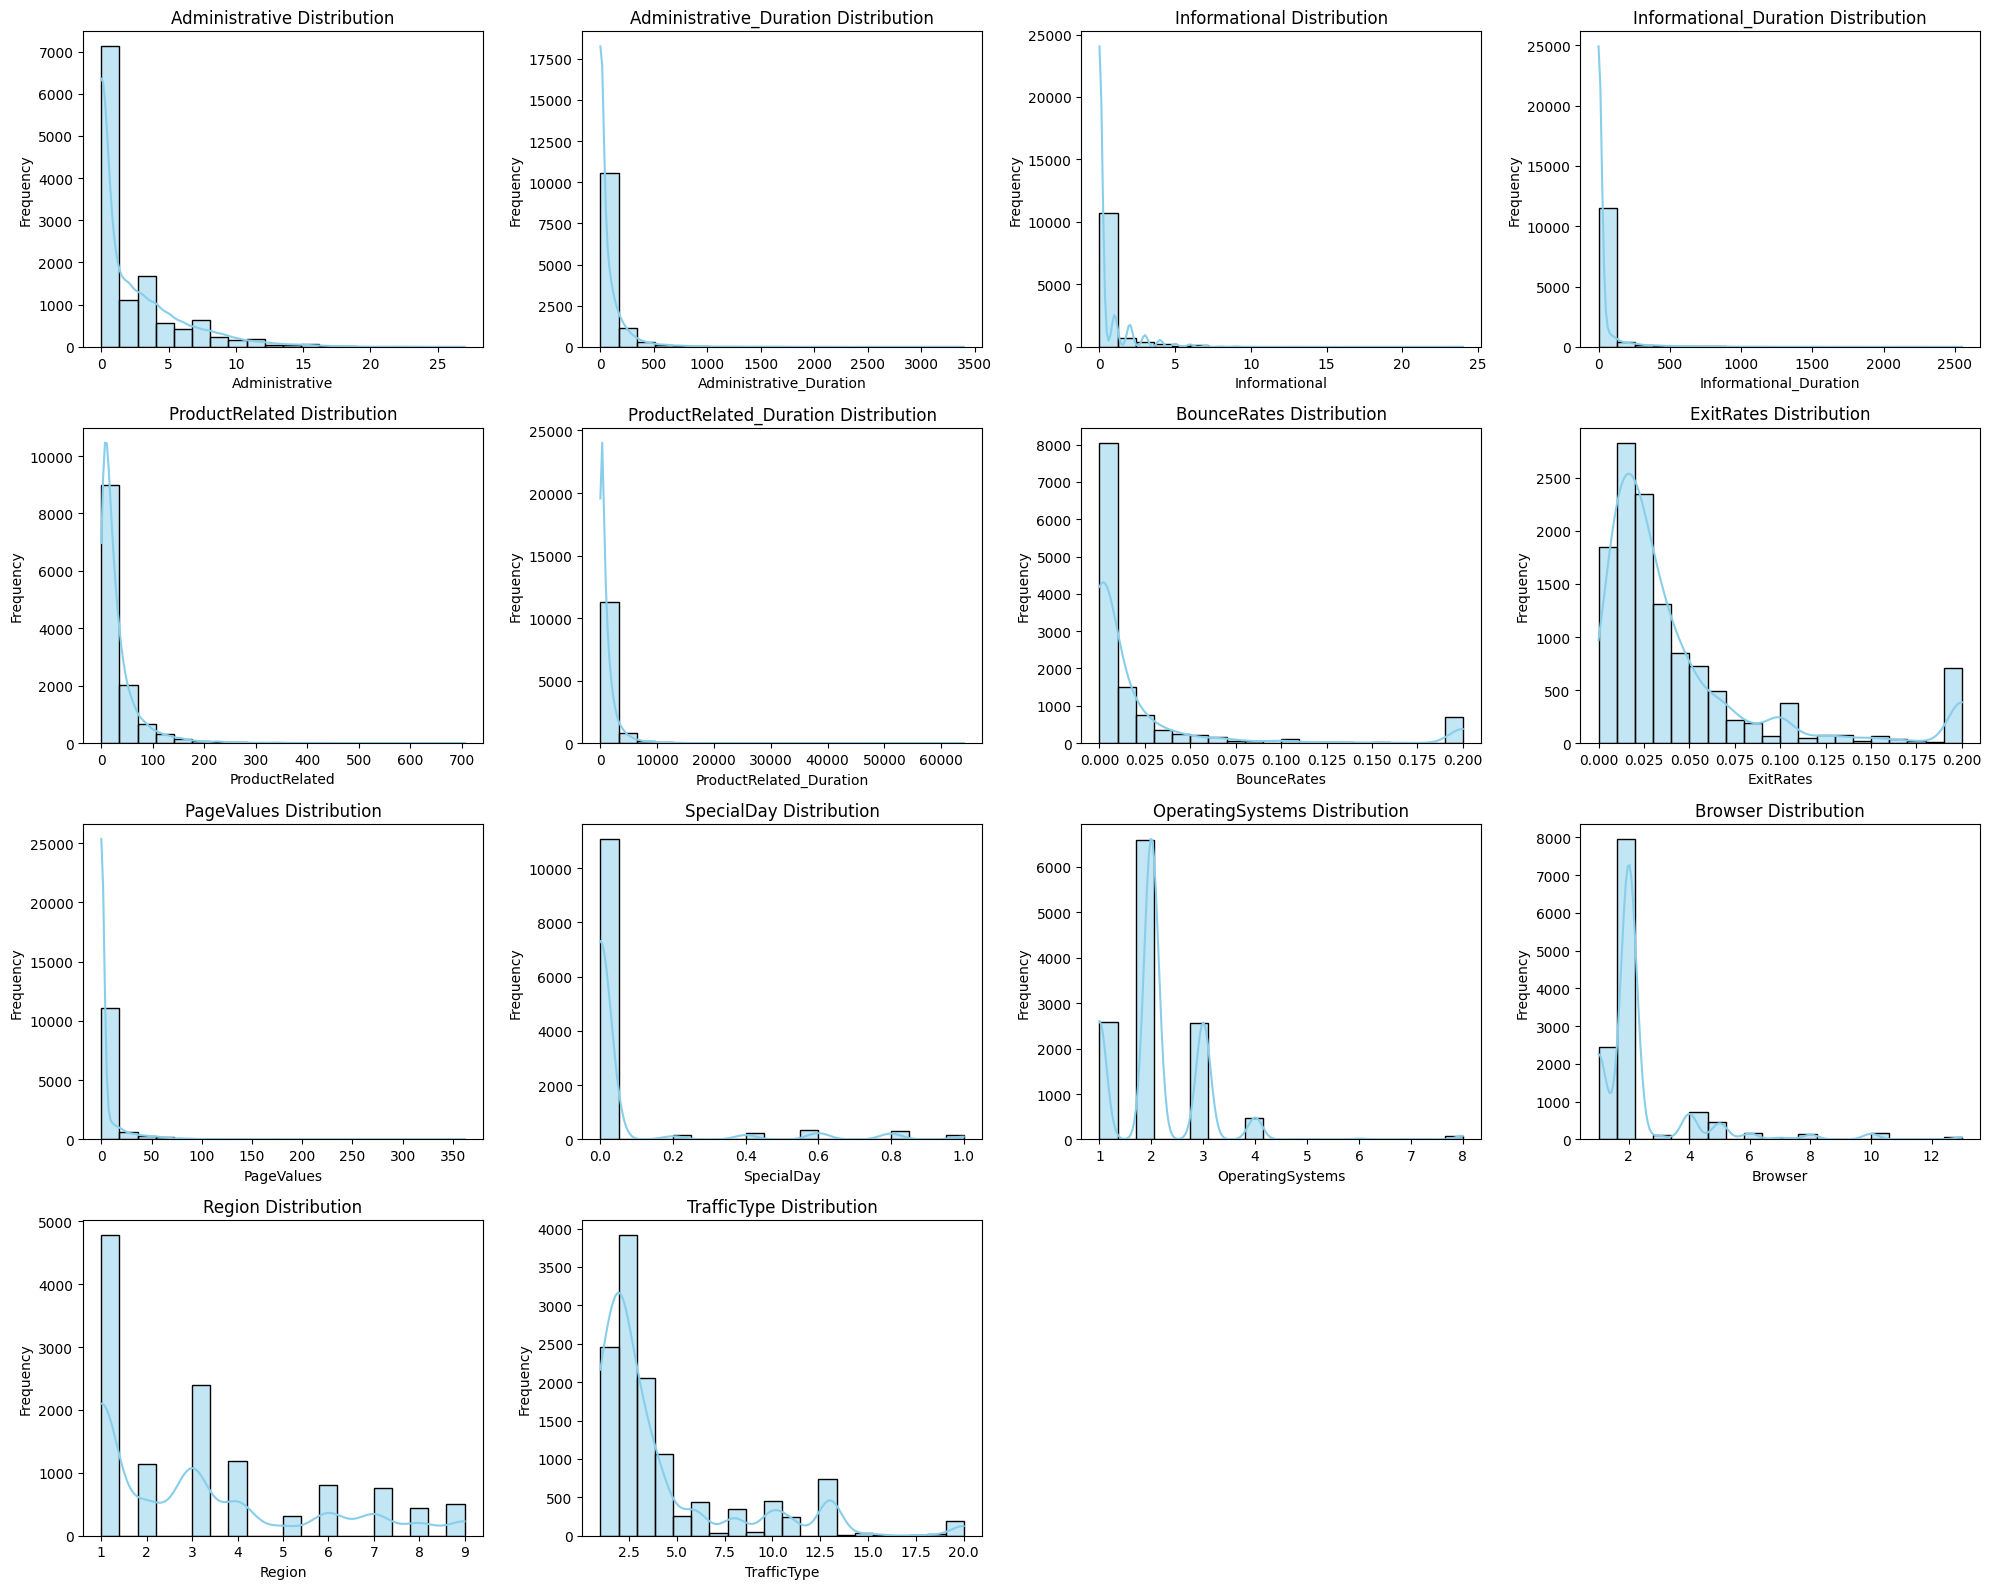

In [7]:
# --- Numerical Variables Analysis (Fixed Version) ---

# This section focuses on understanding the distribution and behavior of numerical variables in the dataset.
# Numerical variables, such as "PageValues", "BounceRates", "ExitRates", and "Administrative_Duration", contain quantitative information that helps explain user behavior during online shopping sessions.
# Exploring these variables is key to identifying potential factors that influence purchase likelihood.

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

print("=== NUMERICAL VARIABLES ===")

# Select numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns
# The code first selects all numerical columns using select_dtypes().
# This ensures that only continuous or discrete numerical variables are included for analysis,

print(f"Numerical columns: {list(numerical_cols)}")

# --- Summary Statistics ---
# (mean, standard deviation, quartiles, etc.) are printed to provide a quick snapshot

print("\n--- Basic Descriptive Statistics ---")
print(df[numerical_cols].describe())

# --- Visualize Distributions ---
# Each numerical variable is visualized using a histogram with a KDE (Kernel Density Estimate) overlay.
#   - They show how data points are distributed across different ranges (bins).
#   - They make it easy to spot skewness, multimodality, or unusual gaps in data (affecting statistical inference as well).

num_cols = len(numerical_cols)
n_cols = 4  # number of plots per row
n_rows = int(np.ceil(num_cols / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], bins=20, kde=True, color='skyblue', ax=axes[i])
    axes[i].set_title(f'{col} Distribution')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Hide any extra empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()




=== CATEGORICAL VARIABLES ===
Categorical columns: ['Month', 'VisitorType', 'Weekend', 'Revenue']

--- Month Value Counts ---
Month
May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: count, dtype: int64


/tmp/ipykernel_2416/3044634313.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='husl')


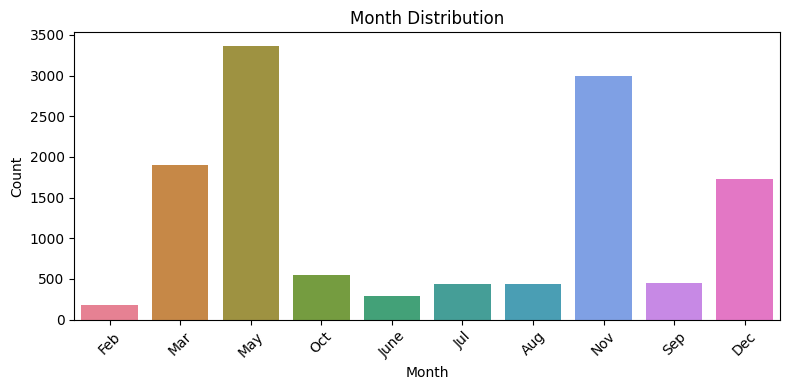

/tmp/ipykernel_2416/3044634313.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='husl')



--- VisitorType Value Counts ---
VisitorType
Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: count, dtype: int64


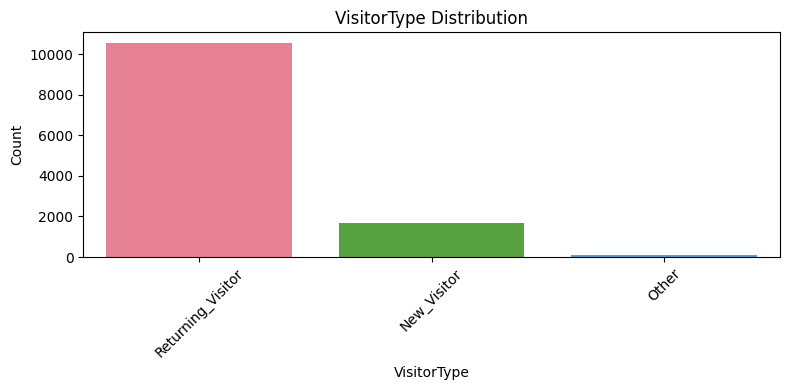


--- Weekend Value Counts ---
Weekend
False    9462
True     2868
Name: count, dtype: int64


/tmp/ipykernel_2416/3044634313.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='husl')


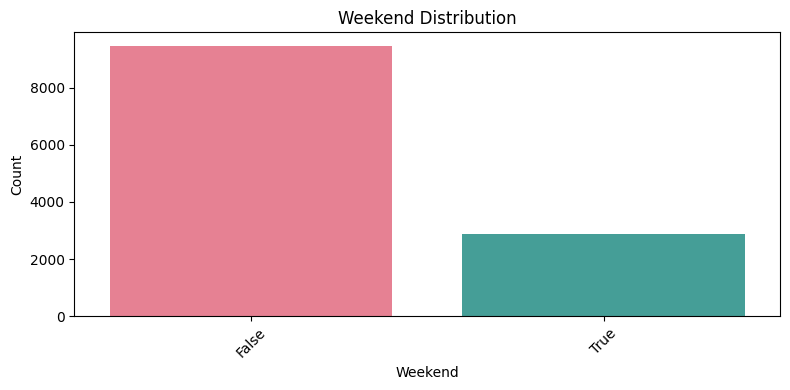


--- Revenue Value Counts ---
Revenue
False    10422
True      1908
Name: count, dtype: int64


/tmp/ipykernel_2416/3044634313.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='husl')


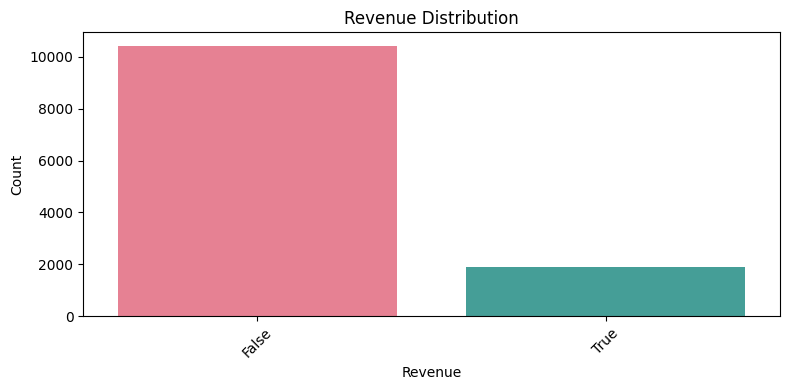

In [8]:
# --- Categorical Variables Analysis ---
# This section aims to explore and understand categorical variables in the dataset.

import matplotlib.pyplot as plt
import seaborn as sns

print("=== CATEGORICAL VARIABLES ===")

# Select categorical columns (object or boolean types)
categorical_cols = df.select_dtypes(include=['object', 'bool']).columns
# df.select_dtypes(include=['object', 'bool']) is used to automatically extract columns that contain text or boolean data types (True/False). 

print(f"Categorical columns: {list(categorical_cols)}")

# Loop through each categorical variable
for col in categorical_cols:
    print(f"\n--- {col} Value Counts ---")
    print(df[col].value_counts())
    
    # --- Visualization ---
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, palette='husl')
    # sns.countplot() is an ideal choice for categorical variables because:
    #   - It displays the frequency of each category clearly.
    #   - It allows for easy comparison across categories.
    #   - It visually highlights any data imbalance (e.g., many more 'Returning_Visitors' than 'New_Visitors').
    
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [9]:
print(df.columns.tolist())


['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue']


=== CORRELATION ANALYSIS ===


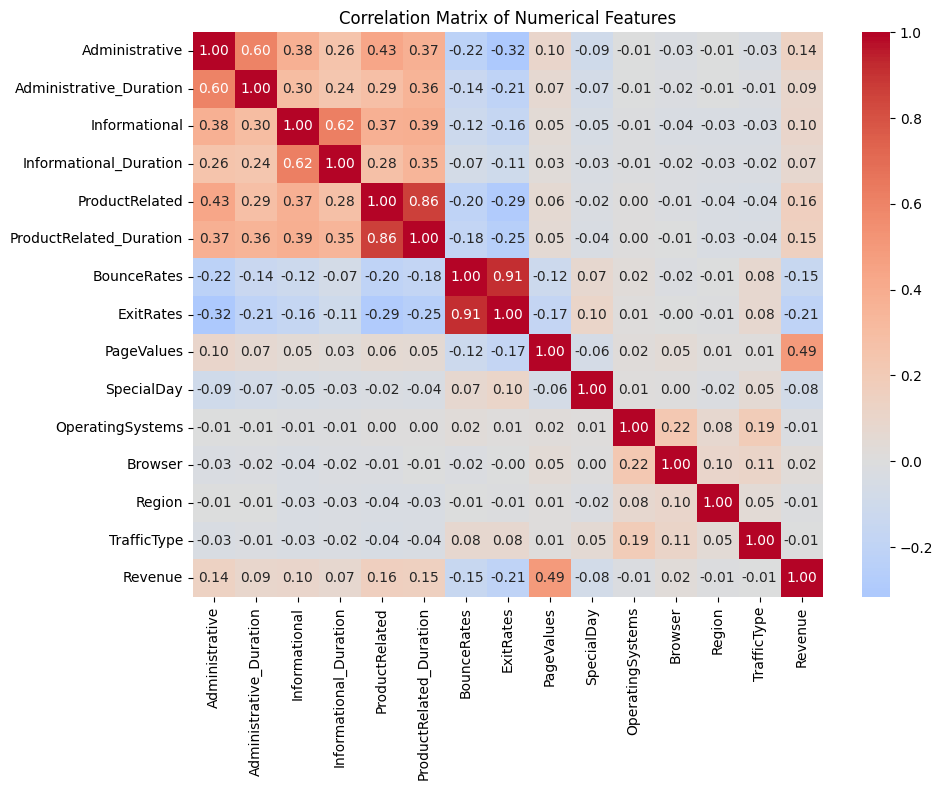


=== Correlations with Target Variable (Revenue) ===
Revenue                    1.000000
PageValues                 0.492569
ProductRelated             0.158538
ProductRelated_Duration    0.152373
Administrative             0.138917
Informational              0.095200
Administrative_Duration    0.093587
Informational_Duration     0.070345
Browser                    0.023984
TrafficType               -0.005113
Region                    -0.011595
OperatingSystems          -0.014668
SpecialDay                -0.082305
BounceRates               -0.150673
ExitRates                 -0.207071
Name: Revenue, dtype: float64


In [10]:
# --- Correlation Analysis ---
print("=== CORRELATION ANALYSIS ===")
# The goal here is to identify how numerical variables relate to each other, especially how they correlate with the target variable — 'Revenue' (purchase or not).

# Convert boolean 'Revenue' to integer (True=1, False=0)
# This step ensures 'Revenue' can be included in the correlation calculation,

if df['Revenue'].dtype == 'bool':
    df['Revenue'] = df['Revenue'].astype(int)

# Compute correlation matrix for numerical columns
# Each value ranges from -1 to +1:
#   - +1 means a perfect positive relationship (as one increases, the other also increases)
#   - -1 means a perfect negative relationship (as one increases, the other decreases)
#   - 0 means no linear relationship
correlation_matrix = df.select_dtypes(include=[np.number]).corr()

# Plot heatmap
# The heatmap makes it easy to see which variables are strongly correlated — visually and intuitively.
#   - Dark red → strong positive correlation
#   - Dark blue → strong negative correlation
#   - Light colors → weak or no correlation

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

# Correlations with target variable
target_correlations = correlation_matrix['Revenue'].sort_values(ascending=False)
print("\n=== Correlations with Target Variable (Revenue) ===")
print(target_correlations)



=== RELATIONSHIPS WITH TARGET (Revenue) ===


/tmp/ipykernel_2416/1909067600.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Revenue', y=col, data=df, ax=axes[i], palette='husl')
/tmp/ipykernel_2416/1909067600.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Revenue', y=col, data=df, ax=axes[i], palette='husl')
/tmp/ipykernel_2416/1909067600.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Revenue', y=col, data=df, ax=axes[i], palette='husl')
/tmp/ipykernel_2416/1909067600.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be r

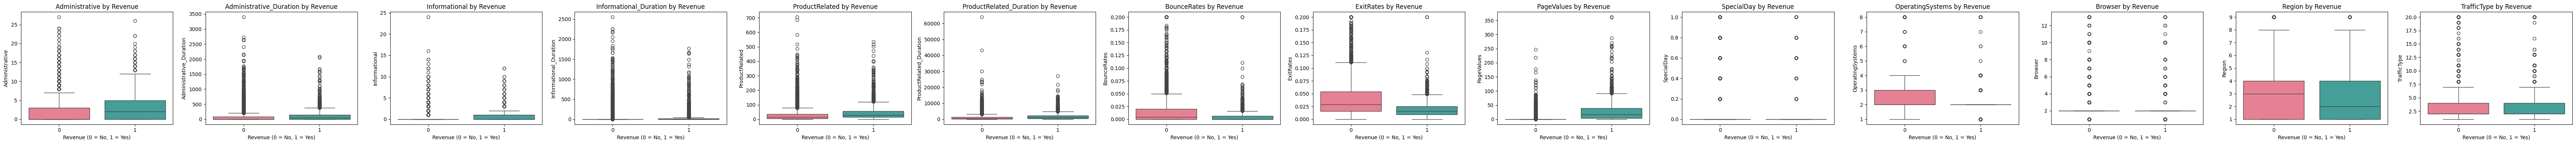


Month vs Revenue:
Revenue      0      1
Month                
Aug      0.824  0.176
Dec      0.875  0.125
Feb      0.984  0.016
Jul      0.847  0.153
June     0.899  0.101
Mar      0.899  0.101
May      0.891  0.109
Nov      0.746  0.254
Oct      0.791  0.209
Sep      0.808  0.192


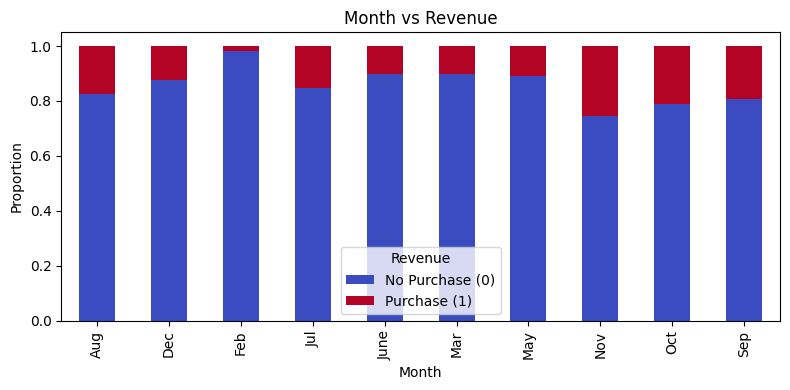


VisitorType vs Revenue:
Revenue                0      1
VisitorType                    
New_Visitor        0.751  0.249
Other              0.812  0.188
Returning_Visitor  0.861  0.139


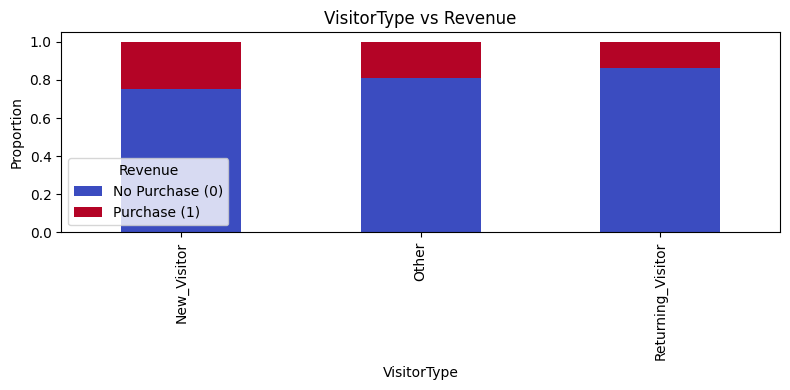

In [11]:
# --- Relationship Between Variables and Target (Revenue) ---
# This step is crucial for understanding which factors drive conversions and helps generate insights that can guide business strategy.
print("=== RELATIONSHIPS WITH TARGET (Revenue) ===")

# Convert Revenue to integer if still boolean (True=1, False=0)
if df['Revenue'].dtype == 'bool':
    df['Revenue'] = df['Revenue'].astype(int)

# --- Boxplots for Numerical Variables vs Revenue ---
# 1. good for comparing distributinos between two groups
# 2. show differnces in central tendency and spread 
numerical_cols_no_target = [col for col in df.select_dtypes(include=[np.number]).columns if col != 'Revenue']

if len(numerical_cols_no_target) > 0:
    num_plots = len(numerical_cols_no_target)
    fig, axes = plt.subplots(1, num_plots, figsize=(5*num_plots, 4))
    
    # Handle if there's only one numeric column
    if num_plots == 1:
        axes = [axes]

    for i, col in enumerate(numerical_cols_no_target):
        sns.boxplot(x='Revenue', y=col, data=df, ax=axes[i], palette='husl')
        axes[i].set_title(f'{col} by Revenue')
        axes[i].set_xlabel('Revenue (0 = No, 1 = Yes)')
        axes[i].set_ylabel(col)

    plt.tight_layout()
    plt.show()

# --- Crosstabs for Categorical Variables vs Revenue ---
categorical_cols = df.select_dtypes(include=['object']).columns
# This generates a stacked bar chart where each bar represents a category (e.g., Returning Visitor, New Visitor) split into proportions of purchase and non-purchase sessions.
# Makes it easy to compare proportions visually without reading raw numbers.

for col in categorical_cols:
    print(f"\n{col} vs Revenue:")
    crosstab = pd.crosstab(df[col], df['Revenue'], normalize='index')
    print(crosstab.round(3))
    
    # Bar plot for visualization
    crosstab.plot(kind='bar', stacked=True, figsize=(8, 4), colormap='coolwarm')
    plt.title(f'{col} vs Revenue')
    plt.xlabel(col)
    plt.ylabel('Proportion')
    plt.legend(title='Revenue', labels=['No Purchase (0)', 'Purchase (1)'])
    plt.tight_layout()
    plt.show()


## 3. Hypothesis Formulation

Based on your EDA, formulate **2-3 testable hypotheses**. Each hypothesis should be:
- Clear and specific
- Testable with statistical methods
- Grounded in your observations

### Hypothesis 1: [Relationship between Page Values and Purchase (through Revenue)]
**H1:** [higher PageValues are more likely to result in a purchase]
- **Null Hypothesis (H0):** [There is no significant difference in the mean PageValues between sessions that resulted in a purchase (RevenueTrue = 1) and those that did not (RevenueFalse = 0).]
- **Alternative Hypothesis (H1):** [The mean PageValues for sessions that resulted in a purchase (RevenueTrue = 1) is significantly higher than for sessions without a purchase (RevenueFalse = 0).]
- **Rationale:** [PageValues represent the average value of a page user viewed before a transaction. If users in session with purchases view more valuable pages, their pageValues should be higher and therefore indicating stronger intention to buy.]

### Hypothesis 2: [Visitor Type and Purchase Likelihood]
**H2:** [Returning visitors are more likely to make a purchase than new visitors]
- **Null Hypothesis (H0):** [There is no association between VisitorType and Revenue]
- **Alternative Hypothesis (H1):** [There is an association between VisitorType and Revenue — returning visitors have a higher likelihood of making a purchase.]
- **Rationale:** [The returning visitors may be more familiar with products or services and thus are more likely to complete a purchase.]

### Hypothesis 3: [Weekend Effect on Purchases - optional]
**H3:** [Purchases are more likely to occur on weekends]
- **Null Hypothesis (H0):** [There is no relationship between Weekend and Revenue]
- **Alternative Hypothesis (H1):** [There is a relationship between Weekend and Revenue — purchases are more frequent during weekends since people have more free time]
- **Rationale:** [Many online shoppers have more free time to browse and buy products on weekends.]

---


## 4. Hypothesis Testing

Test each hypothesis using appropriate statistical methods. For each test, explain:
- Why you chose this test
- The results and interpretation
- Whether you reject or fail to reject the null hypothesis


### Testing Hypothesis 1: [higher PageValues are more likely to result in a purchase]

**Test Choice:** [one-tailed t test]
- **Why appropriate:** [PageValues is continuous and Revenue defines two independent groups. Also I'm testing if the mean PageValues for purchases (RevenueTrue = 1) is greater than for non-purchases(RevenueFalse = 0), not just difference and therefore one-tailed test]


In [12]:
%pip show scipy

Name: scipy
Version: 1.15.2
Summary: Fundamental algorithms for scientific computing in Python
Home-page: https://scipy.org/
Author: 
Author-email: 
License: Copyright (c) 2001-2002 Enthought, Inc. 2003-2024, SciPy Developers.
 All rights reserved.

 Redistribution and use in source and binary forms, with or without
 modification, are permitted provided that the following conditions
 are met:

 1. Redistributions of source code must retain the above copyright
    notice, this list of conditions and the following disclaimer.

 2. Redistributions in binary form must reproduce the above
    copyright notice, this list of conditions and the following
    disclaimer in the documentation and/or other materials provided
    with the distribution.

 3. Neither the name of the copyright holder nor the names of its
    contributors may be used to endorse or promote products derived
    from this software without specific prior written permission.

 THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLD

In [13]:
%pip install scipy


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [14]:
from scipy import stats
from scipy.stats import ttest_ind

In [15]:
# Hypothesis 1 Testing
print("=== TESTING HYPOTHESIS 1 ===")

# Your code for testing hypothesis 1 here
# Example structure:
# 1. Prepare your data
# 2. Check assumptions if needed
# 3. Perform the statistical test
# 4. Interpret results

### Testing Hypothesis 1: PageValues vs. Revenue (Faster Non-Parametric Test)

print("H₀: Md₁ ≤ Md₂  (Median PageValues for purchasing sessions is not greater)")
print("H₁: Md₁ > Md₂  (Median PageValues for purchasing sessions is greater)")

from scipy.stats import mannwhitneyu

# Step 1: Prepare groups
# Split the dataset into two groups based on the Revenue outcome
group_no_purchase = df[df['Revenue'] == 0]['PageValues']
group_purchase = df[df['Revenue'] == 1]['PageValues']

# Step 2: Use Mann–Whitney U test instead of t-test
# This test does not assume normal distribution (PageValues is skewed with many zeros)
# and is much faster because we skip the normality checks and use rank-based comparison.
# 'alternative="greater"' makes it a one-tailed test.
u_stat, p_value = mannwhitneyu(group_purchase, group_no_purchase, alternative='greater')

# Step 3: Display results
print(f"\nU-statistic: {u_stat:.4f}")
print(f"One-tailed p-value: {p_value:.6f}")

# Step 4: Interpretation
alpha = 0.05
if p_value < alpha:
    print("✅ Reject H₀: Purchasing sessions have significantly higher PageValues.")
else:
    print("❌ Fail to reject H₀: No significant evidence that PageValues are higher for purchasing sessions.")

# ⚡ Note on Speed Optimization:
# - Removed Shapiro-Wilk normality checks (very slow on large samples)
# - Used Mann–Whitney U test, which handles non-normal data efficiently
# - Avoided random sampling since this test runs fast on the full dataset


=== TESTING HYPOTHESIS 1 ===
H₀: Md₁ ≤ Md₂  (Median PageValues for purchasing sessions is not greater)
H₁: Md₁ > Md₂  (Median PageValues for purchasing sessions is greater)

U-statistic: 17166757.0000
One-tailed p-value: 0.000000
✅ Reject H₀: Purchasing sessions have significantly higher PageValues.


### Testing Hypothesis 2: [Returning visitors are more likely to make a purchase than new visitors]

**Test Choice:** [chi-square (one-tail)]
- **Why appropriate:** [because both variables are categorical variables, and we choose one-tail because we want to test whether returning visitors are more likely to purchase then new visitors]


In [16]:
# Hypothesis 2 Testing
print("=== TESTING HYPOTHESIS 2 ===")

# Your code for testing hypothesis 2 here
# Example for chi-square test:
# contingency_table = pd.crosstab(df['var1'], df['var2'])
# chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
# print(f"Chi-square statistic: {chi2:.4f}")
# print(f"p-value: {p_value:.4f}")
# 
### Testing Hypothesis 2: Visitor Type vs. Revenue

print("H₀: Returning visitors are not more likely to make a purchase.")
print("H₁: Returning visitors are more likely to make a purchase.")

from scipy.stats import chi2_contingency

# Step 1: Create a contingency table
contingency_table = pd.crosstab(df['VisitorType'], df['Revenue'])
print("\n=== Contingency Table ===")
print(contingency_table)

# Step 2: Perform Chi-square test of independence
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"\nChi-square statistic: {chi2:.4f}")
print(f"Two-tailed p-value: {p_value:.6f}")

# Step 3: Convert to one-tailed p-value (since we only test if returning visitors buy more)
p_value_one_tailed = p_value / 2

print(f"One-tailed p-value: {p_value_one_tailed:.6f}")

# Step 4: Interpretation
alpha = 0.05
if p_value_one_tailed < alpha:
    print("✅ Reject H₀: Returning visitors are significantly more likely to make a purchase.")
else:
    print("❌ Fail to reject H₀: No significant evidence that returning visitors are more likely to make a purchase.")


=== TESTING HYPOTHESIS 2 ===
H₀: Returning visitors are not more likely to make a purchase.
H₁: Returning visitors are more likely to make a purchase.

=== Contingency Table ===
Revenue               0     1
VisitorType                  
New_Visitor        1272   422
Other                69    16
Returning_Visitor  9081  1470

Chi-square statistic: 135.2519
Two-tailed p-value: 0.000000
One-tailed p-value: 0.000000
✅ Reject H₀: Returning visitors are significantly more likely to make a purchase.


### Testing Hypothesis 3: [Purchases are more likely to occur on weekends]

**Test Choice:** [Proportion Z-Test (one-tailed)]
- **Why appropriate:** [we're testing two independent categorical variables, and one-tail cause we assume people make more purchases on the weekend because they are likely to have more free time]


In [17]:
%pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 49.7 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [statsmodels] [statsmodels]

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [18]:
# Hypothesis 3 Testing (if applicable)
print("=== TESTING HYPOTHESIS 3 ===")

# Your code for testing hypothesis 3 here
### Testing Hypothesis 3 (One-tailed): Weekend vs. Revenue

print("H₀: Weekend purchase rate ≤ Weekday purchase rate")
print("H₁: Weekend purchase rate > Weekday purchase rate")

import numpy as np
from statsmodels.stats.proportion import proportions_ztest

# Step 1: Count successes (purchases) and total sessions for each group
purchase_counts = np.array([
    df.loc[df['Weekend'] == 0, 'Revenue'].sum(),  # weekday purchases
    df.loc[df['Weekend'] == 1, 'Revenue'].sum()   # weekend purchases
])
session_counts = np.array([
    (df['Weekend'] == 0).sum(),  # total weekday sessions
    (df['Weekend'] == 1).sum()   # total weekend sessions
])

# Step 2: Perform one-tailed z-test for proportions
z_stat, p_value_two_tailed = proportions_ztest(purchase_counts, session_counts, alternative='two-sided')

# Convert to one-tailed (since we only care if weekend > weekday)
p_value_one_tailed = p_value_two_tailed / 2 if z_stat > 0 else 1 - (p_value_two_tailed / 2)

# Step 3: Display results
print(f"\nZ-statistic: {z_stat:.4f}")
print(f"One-tailed p-value: {p_value_one_tailed:.6f}")

# Step 4: Interpretation
alpha = 0.05
if p_value_one_tailed < alpha:
    print("✅ Reject H₀: Purchase rate is significantly higher on weekends.")
else:
    print("❌ Fail to reject H₀: No significant evidence that weekend purchase rate is higher.")



=== TESTING HYPOTHESIS 3 ===
H₀: Weekend purchase rate ≤ Weekday purchase rate
H₁: Weekend purchase rate > Weekday purchase rate

Z-statistic: -3.2530
One-tailed p-value: 0.999429
❌ Fail to reject H₀: No significant evidence that weekend purchase rate is higher.


## 5. Summary and Conclusions

### Key Findings from EDA:
1. [From Target Variable Analysis: Revenue]
    - [observation: only about 15.47% of sessions resulted in purchases]
    - [pattern: most users visit the site without completing the purchase]
    - [interesting relationship: low purchasing rate highlights the importance of identifying behavioral patters that distinguish purchasing sessions from non-purchasing ones.] 
2. [Numerical variables: PageValues and BounceRates]
    - [observation: from numerical variable analysis, we can see that the histograms showed skewness]
    - [pattern: higher PageValues for purchasing sessions]
    - [interesting relationship: there might be positive relationship between purchasing sessions and PageValues, related to hypothesis one]

### Hypothesis Testing Results:

| Hypothesis | Test Used | p-value | Result | Interpretation |
|------------|-----------|---------|--------|-----------------|
| **H1: PageValues vs. Revenue** | [one-tailed t test] | [about 0.000] | [Significant] | [Purchasing sessions have higher PageValues] |
| **H2: VisitorType vs. Revenue** | [Chi-Square Test] | [about 0.000] | [Significant] | [Returning visitors are significantly more likely to make a purchase] |
| **H3: Weekend vs. Revenue** | [One-Tailed Proportion Z-Test] | [0.999] | [Not] | [No evidence that purchase rate is higher on weekends compared to weekdays] |

### Key Insights:
- [1. PageValues is a strong indicator of purchase behavior, higher PageValues with purchassing sessions. 2. Returning visitors are significantly more likely to make purchases than new visitors. 3. Weekend sessions do not significantly affect purchase likelihood, suggesting day-of-week is not a stronger driver behind purchasing.]
- [Focus more on increasing PageValues per session, implement strategies to retain vistors since they have higher purchasing power, resources used on weekend-focused promotions can be used in elsewhere]
- [The observational data cannot prove causation, only association. Other factors like region or duration were not analyzed and may influence purchase behavior.]

### Future Research:
- [Future research can focus on explore additional variables that are not tested.]
- [Region and duration variables might also have strong influence on purchasing.]

---

**Note:** Remember to replace the sample data with your actual dataset and fill in all the template sections with your own analysis and interpretations.


In [19]:
# Final summary
print("=== ANALYSIS COMPLETE ===")
print(f"Dataset analyzed: Online Shoppers Purchasing Intention")
print(f"Sample size: {len(df)} observations")
print(f"Number of features: {df.shape[1]-1} (excluding target)")
print(f"\nAnalysis completed successfully!")
print("\nRemember to:")
print("1. Replace sample data with your actual dataset")
print("2. Fill in all template sections with your analysis")
print("3. Provide clear explanations for your choices")
print("4. Interpret your results meaningfully")


=== ANALYSIS COMPLETE ===
Dataset analyzed: Online Shoppers Purchasing Intention
Sample size: 12330 observations
Number of features: 17 (excluding target)

Analysis completed successfully!

Remember to:
1. Replace sample data with your actual dataset
2. Fill in all template sections with your analysis
3. Provide clear explanations for your choices
4. Interpret your results meaningfully
